# Analiza Sentiment leksikona -GTP2-Orao




In [2]:

import pandas as pd

In [3]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [4]:
sent_an = pd.read_csv(RES_DIR + "srbsentiwordnet_a6.csv",  index_col=0)

In [5]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [6]:
sent_an

,POS,NEG,Lemme,Definicija,Vrsta,OBJ
ID,,,,,,
ENG30-03574555-n,1.788111e-07,0.000006,ustanova,zgrada u kojoj se nalazi organizaciona jedinic...,n,0.999994
ENG30-07810907-n,1.430480e-06,0.000007,začin,pripremljeni dodatak jelu za poboljšanje ukusa,n,0.999991
ENG30-00721431-n,1.281200e-06,0.000075,mesto,"u nečijim prilikama, mogućnostima",n,0.999924
ENG30-00473799-v,4.470226e-07,0.000011,"obnoviti,doterati,uglancati,uljuditi",Ostalo je još samo da se doteraju neke finese ...,v,0.999989
ENG30-00903385-v,3.099366e-06,0.000023,oprostiti,Zapad mu je oprostio što se nekada računao u S...,v,0.999974
...,...,...,...,...,...,...
ENG30-15266265-n,8.939860e-07,0.000035,mandat,mandat predsednika,n,0.999964
ENG30-15266685-n,2.682106e-07,0.000013,sredina,vreme između početka i kraja vremenskog perioda,n,0.999987
ENG30-15266911-n,9.238161e-07,0.000024,"gotovo,konac,kraj,prestanak,svršetak,završetak",tačka u vremenu kada se nešto završava,n,0.999975


In [7]:
pd.set_option('display.max_rows', None)

## Statistike

In [8]:
# Define bin edges
bin_edges = [i/8 for i in range(9)]
bin_labels = [f"[{bin_edges[i]}, {bin_edges[i+1]})" for i in range(len(bin_edges)-1)]

# Function to bin data and get both count and percentage for each bin
def bin_data(column):
    binned_data = pd.cut(column, bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)
    counts = binned_data.value_counts().sort_index()
    percentages = (counts / counts.sum()) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Apply the function to each column and store results in a dictionary
results = {
    'OBJ': bin_data(sent_an['OBJ']),
    'POS': bin_data(sent_an['POS']),
    'NEG': bin_data(sent_an['NEG'])
}

results

{'OBJ':                Count  Percentage
 OBJ                             
 [0.0, 0.125)     158    0.624013
 [0.125, 0.25)     93    0.367299
 [0.25, 0.375)    259    1.022907
 [0.375, 0.5)     209    0.825434
 [0.5, 0.625)     328    1.295419
 [0.625, 0.75)    522    2.061611
 [0.75, 0.875)    526    2.077409
 [0.875, 1.0)   23225   91.725908,
 'POS':                Count  Percentage
 POS                             
 [0.0, 0.125)   24412   96.413902
 [0.125, 0.25)    215    0.849131
 [0.25, 0.375)    364    1.437599
 [0.375, 0.5)     116    0.458136
 [0.5, 0.625)      86    0.339652
 [0.625, 0.75)     72    0.284360
 [0.75, 0.875)     27    0.106635
 [0.875, 1.0)      28    0.110585,
 'NEG':                Count  Percentage
 NEG                             
 [0.0, 0.125)   23912   94.439179
 [0.125, 0.25)    593    2.342022
 [0.25, 0.375)    200    0.789889
 [0.375, 0.5)     234    0.924171
 [0.5, 0.625)      83    0.327804
 [0.625, 0.75)    156    0.616114
 [0.75, 0.875)     44    

In [9]:
sent_an[sent_an["POS"]>.9][["Lemme", "POS"]]

,Lemme,POS
ID,,
ENG30-06206800-n,"poštovanje,respekt",0.999840
ENG30-00860620-v,"slaviti,veličati,glorifikovati,uzdizati",0.999931
ENG30-01148283-a,srećan,0.998293
ENG30-04616916-n,karakter,0.930308
ENG30-02360448-a,"podložan,prijemčiv",0.999797
ENG30-02646757-v,"osigurati,kupiti",0.955058
ENG30-02356567-v,"setiti se,pomenuti",0.998486
ENG30-01372049-a,ljubazan,0.996126
ENG30-01778568-v,"strahopoštovati,uvažavati",0.930115


In [32]:
sent_an[sent_an["POS"]>.9][["Lemme","Definicija", "POS"]].to_clipboard()

In [11]:
(sent_an["POS"]>.9).sum()

25

Raspored reči prema negativnom polaritetu 

In [12]:
sent_an[sent_an["NEG"]>.9][["Lemme", "NEG"]]

,Lemme,NEG
ID,,
ENG30-01566705-v,"smrskati,skršiti",0.935953
ENG30-07510625-n,šok,0.997538
ENG30-01779165-v,"uplašiti,prestrašiti,prestraviti",0.999801
ENG30-05160173-n,"trulost,nagnjilost",0.939346
ENG30-07537485-n,depresija,0.995920
ENG30-02451951-a,nepopustljiv,0.999925
ENG30-01790020-v,"potresti,obeshrabriti,zaljuljati",0.999692
ENG30-07289014-n,"nevolja,teškoća",0.999651
ENG30-13265011-n,"dar,poklon",0.986479


In [33]:
sent_an[sent_an["NEG"]>.9][["Lemme", "Definicija", "NEG"]].to_clipboard()

In [14]:
(sent_an["NEG"]>.9).sum()

96

Raspored reči prema objektivnosti 

In [15]:
# Define bin edges
bin_edges = [i/8 for i in range(9)]
bin_labels = [f"[{bin_edges[i]}, {bin_edges[i+1]})" for i in range(len(bin_edges)-1)]

# Function to bin data and get both count and percentage for each bin
def bin_data(column):
    binned_data = pd.cut(column, bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)
    counts = binned_data.value_counts().sort_index()
    percentages = (counts / counts.sum()) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Apply the function to each column and store results in a dictionary
results = {
    'OBJ': bin_data(sent_an['OBJ']),
    'POS': bin_data(sent_an['POS']),
    'NEG': bin_data(sent_an['NEG'])
}

results

{'OBJ':                Count  Percentage
 OBJ                             
 [0.0, 0.125)     158    0.624013
 [0.125, 0.25)     93    0.367299
 [0.25, 0.375)    259    1.022907
 [0.375, 0.5)     209    0.825434
 [0.5, 0.625)     328    1.295419
 [0.625, 0.75)    522    2.061611
 [0.75, 0.875)    526    2.077409
 [0.875, 1.0)   23225   91.725908,
 'POS':                Count  Percentage
 POS                             
 [0.0, 0.125)   24412   96.413902
 [0.125, 0.25)    215    0.849131
 [0.25, 0.375)    364    1.437599
 [0.375, 0.5)     116    0.458136
 [0.5, 0.625)      86    0.339652
 [0.625, 0.75)     72    0.284360
 [0.75, 0.875)     27    0.106635
 [0.875, 1.0)      28    0.110585,
 'NEG':                Count  Percentage
 NEG                             
 [0.0, 0.125)   23912   94.439179
 [0.125, 0.25)    593    2.342022
 [0.25, 0.375)    200    0.789889
 [0.375, 0.5)     234    0.924171
 [0.5, 0.625)      83    0.327804
 [0.625, 0.75)    156    0.616114
 [0.75, 0.875)     44    

In [16]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<Axes: title={'center': 'POS'}>, <Axes: title={'center': 'NEG'}>],
       [<Axes: title={'center': 'OBJ'}>, <Axes: >]], dtype=object)

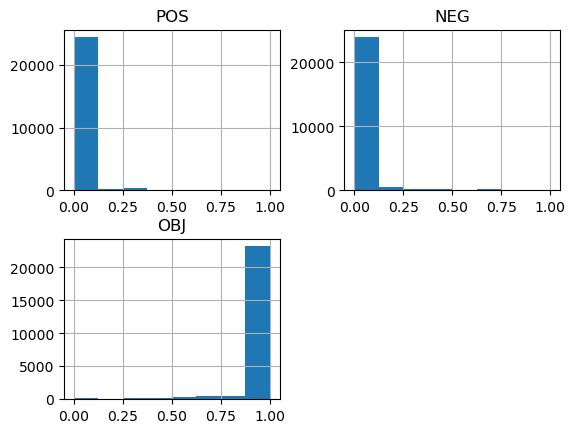

In [17]:
sent_an.hist(bins=8)

<Axes: >

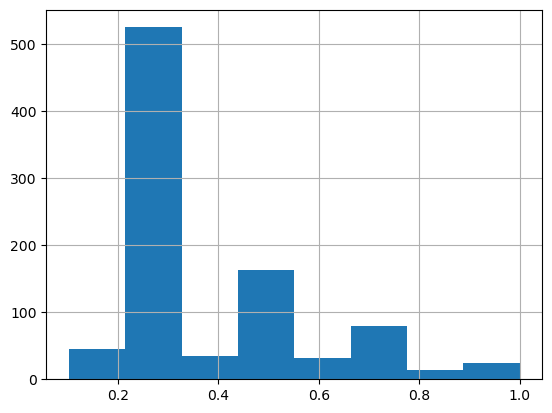

In [18]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<Axes: >

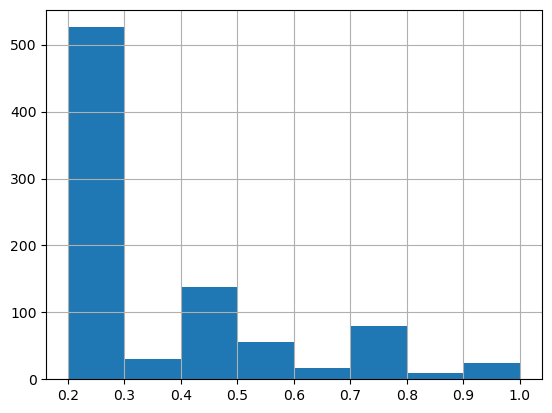

In [19]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<Axes: >

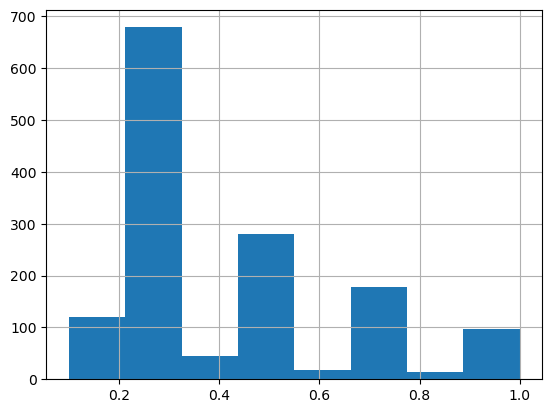

In [20]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<Axes: >

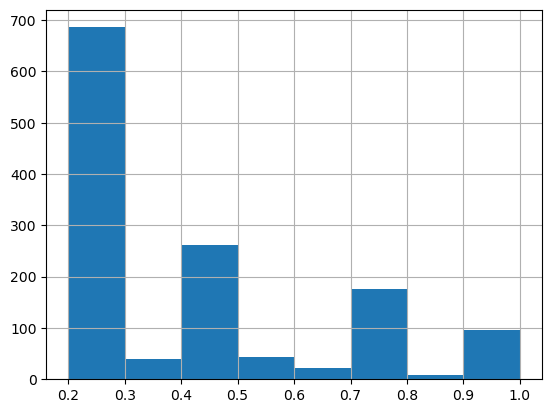

In [21]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [22]:
sent_an["Vrsta"].value_counts(sort=True)

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: ylabel='count'>

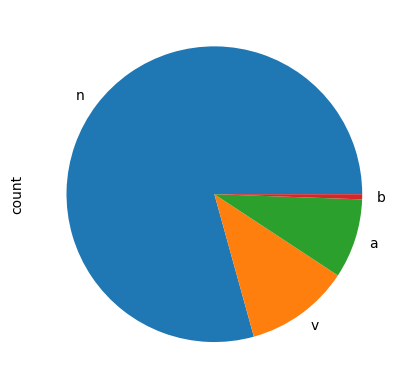

In [23]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

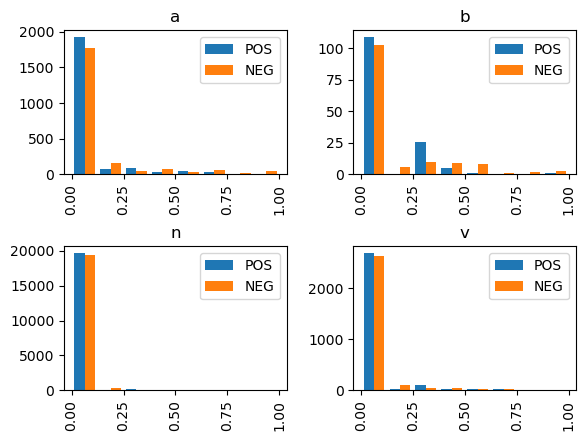

In [24]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

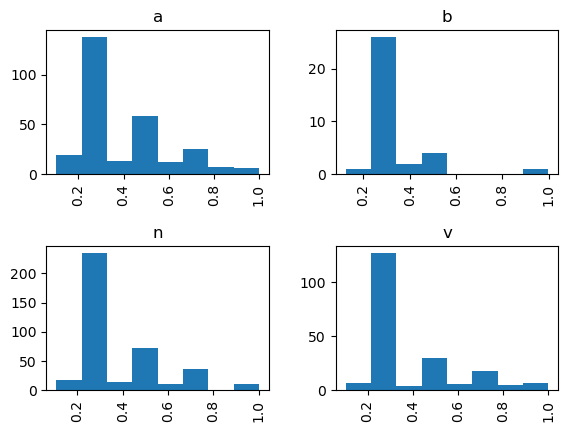

In [25]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

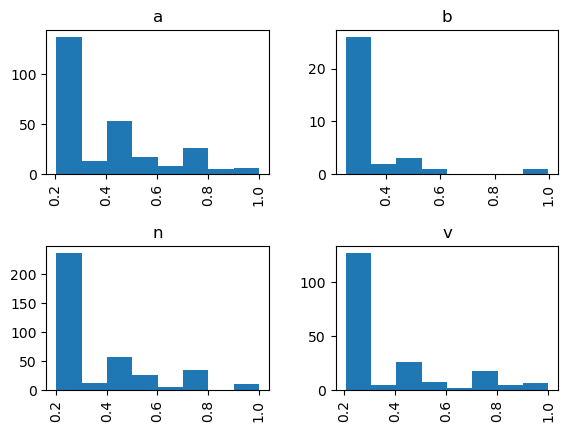

In [26]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

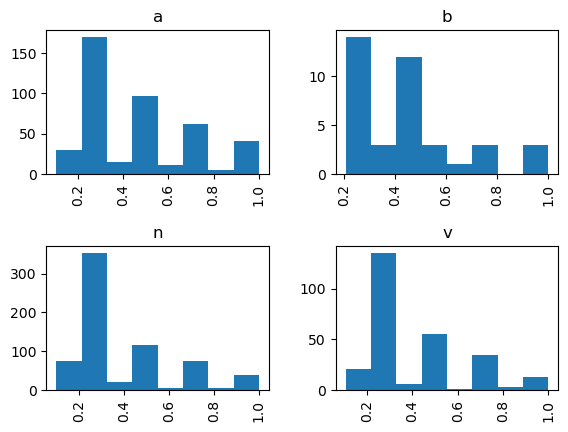

In [27]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

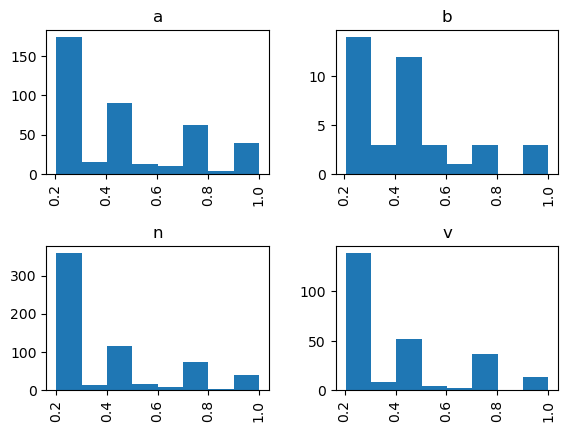

In [28]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

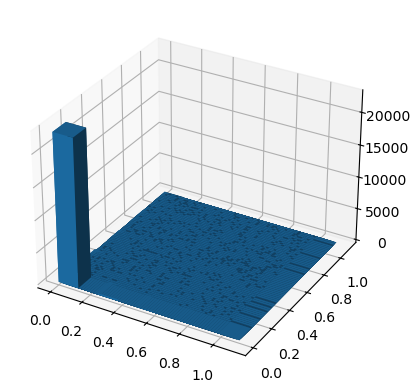

In [29]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<Axes: ylabel='count'>

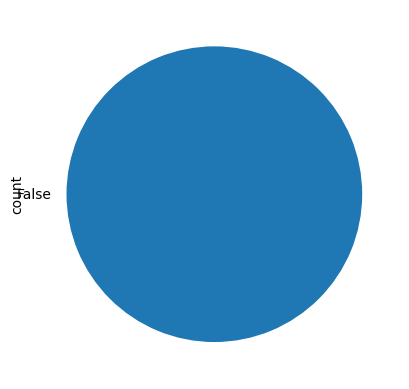

In [30]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

In [31]:
# srbsentiwordnet2.cvs
# srbsentiwordnet_a2.cvs